In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import re


In [2]:
df0 = pd.read_json('scout_car.zip',compression='zip', lines=True)

In [3]:
df = df0.copy()

In [4]:
df.head(3).T

,0,1,2
url,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-sp...
make_model,Audi A1,Audi A1,Audi A1
short_description,Sportback 1.4 TDI S-tronic Xenon Navi Klima,1.8 TFSI sport,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...
body_type,Sedans,Sedans,Sedans
price,15770,14500,14640
vat,VAT deductible,Price negotiable,VAT deductible
km,"56,013 km","80,000 km","83,450 km"
registration,01/2016,03/2017,02/2016
prev_owner,2 previous owners,None,1 previous owner
kW,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            15919 non-null  object 
 1   make_model                     15919 non-null  object 
 2   short_description              15873 non-null  object 
 3   body_type                      15859 non-null  object 
 4   price                          15919 non-null  int64  
 5   vat                            11406 non-null  object 
 6   km                             15919 non-null  object 
 7   registration                   15919 non-null  object 
 8   prev_owner                     9091 non-null   object 
 9   kW                             0 non-null      float64
 10  hp                             15919 non-null  object 
 11  Type                           15917 non-null  object 
 12  Previous Owners                9279 non-null  

In [6]:
df.describe()

,price,kW
count,15919.000000,0.0
mean,18019.896727,NaN
std,7386.169409,NaN
min,13.000000,NaN
25%,12850.000000,NaN
50%,16900.000000,NaN
75%,21900.000000,NaN
max,74600.000000,NaN


In [7]:
df.describe(include=[object]).T

,count,unique,top,freq
url,15919,15919,https://www.autoscout24.com//offers/audi-a1-sp...,1
make_model,15919,9,Audi A3,3097
short_description,15873,10001,SPB 1.6 TDI 116 CV S tronic Sport,64
body_type,15859,9,Sedans,7903
vat,11406,2,VAT deductible,10980
km,15919,6690,10 km,1045
registration,15919,48,-/-,1597
prev_owner,9091,4,1 previous owner,8294
hp,15919,81,85 kW,2542
Type,15917,169,"[, Used, , Diesel (Particulate Filter)]",3475


## columns_name

In [8]:
df.columns

Index(['url', 'make_model', 'short_description', 'body_type', 'price', 'vat',
       'km', 'registration', 'prev_owner', 'kW', 'hp', 'Type',
       'Previous Owners', 'Next Inspection', 'Inspection new', 'Warranty',
       'Full Service', 'Non-smoking Vehicle', 'null', 'Make', 'Model',
       'Offer Number', 'First Registration', 'Body Color', 'Paint Type',
       'Body Color Original', 'Upholstery', 'Body', 'Nr. of Doors',
       'Nr. of Seats', 'Model Code', 'Gearing Type', 'Displacement',
       'Cylinders', 'Weight', 'Drive chain', 'Fuel', 'Consumption',
       'CO2 Emission', 'Emission Class', '\nComfort & Convenience\n',
       '\nEntertainment & Media\n', '\nExtras\n', '\nSafety & Security\n',
       'description', 'Emission Label', 'Gears', 'Country version',
       'Electricity consumption', 'Last Service Date', 'Other Fuel Types',
       'Availability', 'Last Timing Belt Service Date', 'Available from'],
      dtype='object')

In [9]:
my_list = []
for i in df.columns:
    my_list.append(i.lower().replace('-','_').replace(' ', '_').replace('.', '').replace('&', '').replace('\n', '' ).replace('__', '_'))

In [10]:
print(my_list)

['url', 'make_model', 'short_description', 'body_type', 'price', 'vat', 'km', 'registration', 'prev_owner', 'kw', 'hp', 'type', 'previous_owners', 'next_inspection', 'inspection_new', 'warranty', 'full_service', 'non_smoking_vehicle', 'null', 'make', 'model', 'offer_number', 'first_registration', 'body_color', 'paint_type', 'body_color_original', 'upholstery', 'body', 'nr_of_doors', 'nr_of_seats', 'model_code', 'gearing_type', 'displacement', 'cylinders', 'weight', 'drive_chain', 'fuel', 'consumption', 'co2_emission', 'emission_class', 'comfort_convenience', 'entertainment_media', 'extras', 'safety_security', 'description', 'emission_label', 'gears', 'country_version', 'electricity_consumption', 'last_service_date', 'other_fuel_types', 'availability', 'last_timing_belt_service_date', 'available_from']


In [11]:
df.columns = my_list

In [12]:
df.shape

(15919, 54)

In [13]:
is_null = pd.DataFrame(df.isnull().sum(), columns = ['isnull'])
is_null

,isnull
url,0
make_model,0
short_description,46
body_type,60
price,0
vat,4513
km,0
registration,0
prev_owner,6828
kw,15919


In [14]:
percentage_null = pd.DataFrame(df.isnull().sum()/df.shape[0]*100, columns = ['percentage_null'])
percentage_null

,percentage_null
url,0.000000
make_model,0.000000
short_description,0.288963
body_type,0.376908
price,0.000000
vat,28.349771
km,0.000000
registration,0.000000
prev_owner,42.892141
kw,100.000000


In [15]:
summary_null = pd.concat([is_null, percentage_null], axis = 1).reset_index().rename({'index':'Columns'},axis = 1)
summary_null

,Columns,isnull,percentage_null
0,url,0,0.000000
1,make_model,0,0.000000
2,short_description,46,0.288963
3,body_type,60,0.376908
4,price,0,0.000000
5,vat,4513,28.349771
6,km,0,0.000000
7,registration,0,0.000000
8,prev_owner,6828,42.892141
9,kw,15919,100.000000


In [16]:
def df_nans(df, limit):
    missing = df.isnull().sum()*100 / df.shape[0]
    return missing.loc[lambda x : x >= limit]

def column_nans(serial):
    # display percentage of nans in a Series
    return serial.isnull().sum()*100 / serial.shape[0]

In [17]:
df_nans(df, 90)

kw                               100.000000
electricity_consumption           99.139393
last_service_date                 96.444500
other_fuel_types                  94.472015
availability                      96.011056
last_timing_belt_service_date     99.899491
available_from                    98.291350
dtype: float64

In [18]:
column_nans(df["electricity_consumption"])

99.13939317796344

In [19]:
df_nans(df, 80).index

Index(['kw', 'electricity_consumption', 'last_service_date',
       'other_fuel_types', 'availability', 'last_timing_belt_service_date',
       'available_from'],
      dtype='object')

In [20]:
df_nans(df, 80).values

array([100.        ,  99.13939318,  96.44450028,  94.47201457,
        96.01105597,  99.89949117,  98.29134996])

In [21]:
drop_columns = df_nans(df, 80).index
drop_columns

Index(['kw', 'electricity_consumption', 'last_service_date',
       'other_fuel_types', 'availability', 'last_timing_belt_service_date',
       'available_from'],
      dtype='object')

In [22]:
df.drop(columns=drop_columns, axis=1, inplace=True)

In [23]:
df["null"].value_counts()

[]    15919
Name: null, dtype: int64

In [24]:
del df["null"]

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   url                  15919 non-null  object
 1   make_model           15919 non-null  object
 2   short_description    15873 non-null  object
 3   body_type            15859 non-null  object
 4   price                15919 non-null  int64 
 5   vat                  11406 non-null  object
 6   km                   15919 non-null  object
 7   registration         15919 non-null  object
 8   prev_owner           9091 non-null   object
 9   hp                   15919 non-null  object
 10  type                 15917 non-null  object
 11  previous_owners      9279 non-null   object
 12  next_inspection      3535 non-null   object
 13  inspection_new       3932 non-null   object
 14  warranty             10499 non-null  object
 15  full_service         8215 non-null   object
 16  non_

## url

In [26]:
df["url"].value_counts(dropna=False)

https://www.autoscout24.com//offers/audi-a1-sportback-1-4-tdi-s-tronic-xenon-navi-klima-diesel-black-bdab349a-caa5-41b0-98eb-c1345b84445e                  1
https://www.autoscout24.com//offers/opel-insignia-bus-inno-2-0-cdti-aut-navi-bi-xe-led-e6-diesel-black-8710b253-dd98-4ed0-9d46-cbad2d79532b                1
https://www.autoscout24.com//offers/opel-insignia-sport-tourer-opel-sport-tourer-1-6-cdti-136-ch-a-c-diesel-silver-10b7463b-9f56-4348-af35-df3432b2b585    1
https://www.autoscout24.com//offers/opel-insignia-2-0cdti-st-business-innovation-navi-bt-diesel-black-ba5a3368-dedc-4e51-9127-3976b26e93c2                 1
https://www.autoscout24.com//offers/opel-insignia-sport-tourer-opel-sport-tourer-1-6-cdti-136-ch-a-c-diesel-silver-7b52f054-78d3-4d5e-9370-8a7d081d7edd    1
                                                                                                                                                          ..
https://www.autoscout24.com//offers/audi-a3-sb-30-1-6-tdi-

In [27]:
# Even if url contains some information, we do not need it since this information can be obtained from other features
df.drop("url", axis=1, inplace=True)
df.shape

(15919, 45)

## make_model

In [28]:
df.make_model.value_counts(dropna=False)

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2526
Opel Corsa        2219
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

## make

In [29]:
df.make.value_counts(dropna=False)

\nOpel\n       7343
\nAudi\n       5712
\nRenault\n    2864
Name: make, dtype: int64

In [30]:
df["make"] = df.make.str.strip('\n')

# df['make'].map(lambda x : x.strip('\n '), na_action = 'ignore')

In [31]:
df.make.value_counts(dropna=False)

Opel       7343
Audi       5712
Renault    2864
Name: make, dtype: int64

## model

In [32]:
df.model.value_counts(dropna=False)

[\n, A3, \n]          3097
[\n, A1, \n]          2614
[\n, Insignia, \n]    2598
[\n, Astra, \n]       2526
[\n, Corsa, \n]       2219
[\n, Clio, \n]        1839
[\n, Espace, \n]       991
[\n, Duster, \n]        34
[\n, A2, \n]             1
Name: model, dtype: int64

In [33]:
df["model"][0]

['\n', 'A1', '\n']

In [34]:
df["model"][0][1]

'A1'

In [35]:
df["model"].apply(lambda x: x[1])

# df['model'].map(lambda x : x[1], na_action = 'ignore')

0            A1
1            A1
2            A1
3            A1
4            A1
          ...  
15914    Espace
15915    Espace
15916    Espace
15917    Espace
15918    Espace
Name: model, Length: 15919, dtype: object

In [36]:
df.model.str[1]

0            A1
1            A1
2            A1
3            A1
4            A1
          ...  
15914    Espace
15915    Espace
15916    Espace
15917    Espace
15918    Espace
Name: model, Length: 15919, dtype: object

In [37]:
df["model"] = df.model.str[1]

In [38]:
df.model.value_counts(dropna=False)

A3          3097
A1          2614
Insignia    2598
Astra       2526
Corsa       2219
Clio        1839
Espace       991
Duster        34
A2             1
Name: model, dtype: int64

In [39]:
df[['make_model', 'make', 'model']].sample(20)

,make_model,make,model
14131,Renault Clio,Renault,Clio
13583,Renault Clio,Renault,Clio
9436,Opel Corsa,Opel,Corsa
4098,Audi A3,Audi,A3
4997,Audi A3,Audi,A3
1769,Audi A1,Audi,A1
12638,Opel Insignia,Opel,Insignia
7751,Opel Astra,Opel,Astra
1708,Audi A1,Audi,A1
1033,Audi A1,Audi,A1


In [40]:
# After the examination, we have decided to drop the columns, "make" & "model" and kept the column of "make_model.
df.drop(["make", "model"], axis=1, inplace=True)
df.shape

(15919, 43)

## short_description

In [41]:
df.short_description.value_counts(dropna=False)

SPB 1.6 TDI 116 CV S tronic Sport                 64
None                                              46
1.4 66kW (90CV) Selective                         40
MOVE KLIMA CD USB ALLWETTER BLUETOOTH             38
SPB 30 TDI S tronic Business                      35
                                                  ..
K Sports Tourer Business **Navi*Voll**             1
1.0 Turbo ecoFLEX Automatic Elective Park Navi     1
1.6 CDTI Business *Navi*Automatik*Spurh.*          1
1.6 136 CV Automatica Navi E 6 Garanzia Full       1
TCe 225 EDC GPF LIM Deluxe Pano,RFK                1
Name: short_description, Length: 10002, dtype: int64

In [42]:
df['short_description'].nunique()

10001

In [43]:
del df["short_description"]

## description

In [44]:
df['description'].value_counts(dropna=False)

[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [45]:
df['description'].astype('str').nunique()

12874

In [46]:
# Even if the columns of "short_description" & "description" contain detailed information, 
# we do NOT need it since this information can be obtained from other features.
df.drop("description", axis=1, inplace=True)
df.shape

(15919, 41)

## body_type

In [47]:
df.body_type.value_counts(dropna=False)

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
None               60
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

## body

In [48]:
df.body.value_counts(dropna=False)

[\n, Sedans, \n]           7903
[\n, Station wagon, \n]    3553
[\n, Compact, \n]          3153
[\n, Van, \n]               783
[\n, Other, \n]             290
[\n, Transporter, \n]        88
NaN                          60
[\n, Off-Road, \n]           56
[\n, Coupe, \n]              25
[\n, Convertible, \n]         8
Name: body, dtype: int64

In [49]:
df[['body_type', 'body']].sample(20)

,body_type,body
3213,Compact,"[\n, Compact, \n]"
7532,Sedans,"[\n, Sedans, \n]"
5326,Station wagon,"[\n, Station wagon, \n]"
14280,Sedans,"[\n, Sedans, \n]"
3267,Sedans,"[\n, Sedans, \n]"
7834,Station wagon,"[\n, Station wagon, \n]"
689,Sedans,"[\n, Sedans, \n]"
4139,Sedans,"[\n, Sedans, \n]"
1759,Sedans,"[\n, Sedans, \n]"
3534,Sedans,"[\n, Sedans, \n]"


In [50]:
# Both the columns of "body_type" & "body" have the same information, we will keep the "body_type" column which is more readable.
del df["body"]
df.shape

(15919, 40)

## price (target column)

In [51]:
df.price.value_counts(dropna=False)

14990    154
15990    151
10990    139
15900    106
17990    102
        ... 
17559      1
17560      1
17570      1
17575      1
39875      1
Name: price, Length: 2956, dtype: int64

In [52]:
df.price.isnull().sum()

0

In [53]:
df["price"].describe()

count    15919.000000
mean     18019.896727
std       7386.169409
min         13.000000
25%      12850.000000
50%      16900.000000
75%      21900.000000
max      74600.000000
Name: price, dtype: float64

c:\Users\mhsna\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


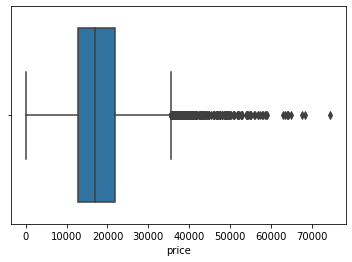

In [54]:
sns.boxplot(df.price);

c:\Users\mhsna\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


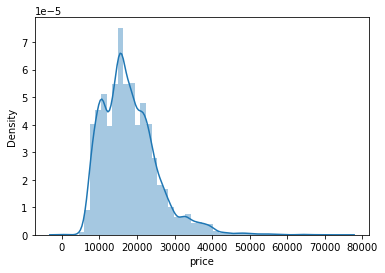

In [55]:
sns.distplot(df.price);

## vat 
Value Added Tax

In [56]:
df.vat.value_counts(dropna=False)

VAT deductible      10980
None                 4513
Price negotiable      426
Name: vat, dtype: int64

## km

In [57]:
df.km.value_counts()

10 km        1045
- km         1024
1 km          367
5 km          170
50 km         148
             ... 
67,469 km       1
43,197 km       1
10,027 km       1
35,882 km       1
57 km           1
Name: km, Length: 6690, dtype: int64

In [58]:
df["km"] = df["km"].str.replace(",","").str.replace(" km", "").replace("-", np.nan).astype(float)
# dash can mean 0 vehicles

In [59]:
df.km.value_counts(dropna=False)

10.0       1045
NaN        1024
1.0         367
5.0         170
50.0        148
           ... 
67469.0       1
43197.0       1
10027.0       1
35882.0       1
57.0          1
Name: km, Length: 6690, dtype: int64

## registration & first_registration

In [60]:
df["registration"].value_counts(dropna=False)

-/-        1597
03/2018     695
02/2019     585
05/2018     572
03/2019     543
01/2019     541
04/2018     541
02/2018     539
03/2016     536
04/2016     532
06/2018     532
01/2018     511
04/2019     506
02/2016     472
03/2017     471
05/2016     459
06/2016     452
05/2019     440
06/2017     409
05/2017     404
07/2018     396
04/2017     380
01/2016     376
02/2017     368
01/2017     306
08/2018     285
06/2019     224
07/2017     215
11/2017     180
07/2016     176
10/2016     160
10/2017     154
09/2017     149
11/2016     142
09/2018     141
09/2016     141
12/2016     134
12/2017     123
08/2017     114
11/2018     110
12/2018     103
10/2018      97
08/2016      94
07/2019       6
09/2019       5
08/2019       1
11/2019       1
12/2019       1
Name: registration, dtype: int64

In [61]:
df["registration"] = df.registration.str.replace("-/-","")

In [62]:
df["registration"] = pd.to_datetime(df.registration)

In [63]:
df["registration"].value_counts(dropna=False).head(5)

NaT           1597
2018-03-01     695
2019-02-01     585
2018-05-01     572
2019-03-01     543
Name: registration, dtype: int64

In [64]:
df["first_registration"].value_counts(dropna=False)

[\n, 2018, \n]    4522
[\n, 2016, \n]    3674
[\n, 2017, \n]    3273
[\n, 2019, \n]    2853
NaN               1597
Name: first_registration, dtype: int64

In [65]:
df["first_registration"] = df.first_registration.str[1].astype("datetime64")
df["first_registration"].value_counts(dropna=False)


2018-01-01    4522
2016-01-01    3674
2017-01-01    3273
2019-01-01    2853
NaT           1597
Name: first_registration, dtype: int64

In [66]:
df[["registration", "first_registration"]].sample(10)

,registration,first_registration
13957,2017-02-01,2017-01-01
8530,2017-09-01,2017-01-01
6506,2016-01-01,2016-01-01
12767,2019-01-01,2019-01-01
14690,NaT,NaT
6230,2016-02-01,2016-01-01
180,2018-08-01,2018-01-01
1374,2018-11-01,2018-01-01
2328,NaT,NaT
12696,NaT,NaT


In [67]:
# The data used for this project were scraped in 2019.
df["age"] = 2019 - df['first_registration'].dt.year

In [68]:
df.age.value_counts(dropna=False)

1.0    4522
3.0    3674
2.0    3273
0.0    2853
NaN    1597
Name: age, dtype: int64

In [69]:
df.drop(["registration", "first_registration"], axis=1, inplace=True)
df.shape

(15919, 39)

## co2_emission

In [70]:
df["co2_emission"].value_counts(dropna=False)

NaN                            1808
[\n120 g CO2/km (comb)\n]       740
[[], [], []]                    628
[\n99 g CO2/km (comb)\n]        545
[\n97 g CO2/km (comb)\n]        537
                               ... 
[\n14 g CO2/km (comb)\n]          1
[\n1,060 g CO2/km (comb)\n]       1
[\n51 g CO2/km (comb)\n]          1
[\n165 g CO2/km (comb)\n]         1
[\n193 g CO2/km (comb)\n]         1
Name: co2_emission, Length: 124, dtype: int64

In [71]:
df.co2_emission = df.co2_emission.astype(str)

In [72]:
(df.co2_emission.str.count("CO2").value_counts(dropna=False), 
df.co2_emission.str.count("(\d+) g").value_counts(dropna=False),
df.co2_emission.str.count("\d+ g CO2\Skm \(comb\)").value_counts(dropna=False),
df.co2_emission.str.count("\d+,\d").value_counts(dropna=False)
)

(1    13483
 0     2436
 Name: co2_emission, dtype: int64,
 1    13483
 0     2436
 Name: co2_emission, dtype: int64,
 1    13483
 0     2436
 Name: co2_emission, dtype: int64,
 0    15912
 1        7
 Name: co2_emission, dtype: int64)

In [73]:
df["co2_emission"].str.match("\D+\d+,\d+|\d+,\d+").value_counts()

False    15912
True         7
Name: co2_emission, dtype: int64

In [74]:
df["co2_emission"][df["co2_emission"].str.match("\D+\d+,\d+|\d+,\d+")]

4089      ['\n1,060 g CO2/km (comb)\n']
5818     ['\n12,087 g CO2/km (comb)\n']
6578     ['\n12,087 g CO2/km (comb)\n']
6579     ['\n12,087 g CO2/km (comb)\n']
8542     ['\n12,324 g CO2/km (comb)\n']
11888    ['\n14,457 g CO2/km (comb)\n']
12343    ['\n13,983 g CO2/km (comb)\n']
Name: co2_emission, dtype: object

In [75]:
df["co2_emission"] = df["co2_emission"].str.replace(",", "")

In [76]:
# a different dataframe was created due to the possibility of using data from other columns
co2_emission_df =  df["co2_emission"].str.extract("(\d+) g", expand=True)
co2_emission_df.value_counts(dropna=False), co2_emission_df.count()

(NaN    2436
 120     740
 99      545
 97      537
 104     501
        ... 
 193       1
 239       1
 253       1
 331       1
 181       1
 Length: 123, dtype: int64,
 0    13483
 dtype: int64)

## emission_class

In [77]:
df["emission_class"].value_counts(dropna=False)

[\nEuro 6\n]          10139
NaN                    3021
[\nEuro 6d-TEMP\n]     1845
[[], [], []]            607
[\nEuro 6c\n]           127
[\nEuro 5\n]             78
[\nEuro 6d\n]            62
[\nEuro 4\n]             40
Name: emission_class, dtype: int64

In [78]:
df["emission_class"] = df["emission_class"].astype(str)

In [79]:
emission_class_df = df["emission_class"].str.extract("(Euro \d\w-\w+|Euro \d\w|Euro \d+)", expand=True)
emission_class_df.value_counts(dropna=False)

Euro 6          10139
NaN              3628
Euro 6d-TEMP     1845
Euro 6c           127
Euro 5             78
Euro 6d            62
Euro 4             40
dtype: int64

## consumption

In [80]:
df["consumption"].value_counts(dropna=False)

NaN                                                                                   1906
[[3.9 l/100 km (comb)], [4.1 l/100 km (city)], [3.7 l/100 km (country)]]               304
[[4.2 l/100 km (comb)], [5 l/100 km (city)], [3.7 l/100 km (country)]]                 276
[[5.4 l/100 km (comb)], [6.8 l/100 km (city)], [4.5 l/100 km (country)]]               257
[[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]               253
                                                                                      ... 
[[4.2 l/100 km (comb)], [5.3 l/100 km (city)], [3.6 l/100 km (country)]]                 1
[\n, 5.1 l/100 km (comb), \n, 6.4 l/100 km (city), \n, 4.3 l/100 km (country), \n]       1
[[4.6 l/100 km (comb)], [5.4 l/100 km (city)], [6.7 l/100 km (country)]]                 1
[\n, 6.3 l/100 km (comb), \n, \n, \n]                                                    1
[\n, 7.4 l/100 km (comb), \n, 9.6 l/100 km (city), \n, 6 l/100 km (country), \n]         1

In [81]:
df["consumption"] = df["consumption"].astype(str)

In [82]:
(df["consumption"].str.count("comb").value_counts(dropna=False),
df["consumption"].str.count("city").value_counts(dropna=False),
df["consumption"].str.count("country").value_counts(dropna=False),
df["consumption"].str.count("g").value_counts(dropna=False),
df["consumption"].str.count("l/100").value_counts(dropna=False),
df["consumption"].str.count("CO2").value_counts(dropna=False)
)

(1    13886
 0     2033
 Name: consumption, dtype: int64,
 1    13483
 0     2436
 Name: consumption, dtype: int64,
 1    13543
 0     2376
 Name: consumption, dtype: int64,
 0    15888
 3       31
 Name: consumption, dtype: int64,
 3    13333
 0     1937
 1      478
 2      171
 Name: consumption, dtype: int64,
 0    15919
 Name: consumption, dtype: int64)

In [83]:
df["consumption"][df["consumption"].str.count("g") > 1].sample(5)

3117    [['3.4 kg/100 km (comb)'], ['4.3 kg/100 km (ci...
2963    [['3.3 kg/100 km (comb)'], ['4.3 kg/100 km (ci...
3385    [['3.4 kg/100 km (comb)'], ['4.3 kg/100 km (ci...
2666    [['5.3 kg/100 km (comb)'], ['6.5 kg/100 km (ci...
3386    [['3.3 kg/100 km (comb)'], ['4.3 kg/100 km (ci...
Name: consumption, dtype: object

In [84]:
comb_consumption_df = df["consumption"].str.extract("(\d+\.\d+|\d+) l/100\D+comb|(\d+\.\d+|\d+) kg/100\D+comb",expand=True)
comb_consumption_df.count().value_counts(dropna=False)
# created a separate df to be merged later

13855    1
31       1
dtype: int64

In [85]:
city_consumption_df = df["consumption"].str.extract("(\d+\.\d+|\d+) l/100\D+city|(\d+\.\d+|\d+) kg/100\D+city",expand=True)
city_consumption_df.count().value_counts(dropna=False)

13452    1
31       1
dtype: int64

In [86]:
country_consumption_df = df["consumption"].str.extract("(\d+\.\d+|\d+) l/100\D+country|(\d+\.\d+|\d+) kg/100\D+country",expand=True)
country_consumption_df.count().value_counts(dropna=False)

13512    1
31       1
dtype: int64

## emission_label  

In [87]:
df.emission_label.value_counts()

[\n4 (Green)\n]         3553
[\n1 (No sticker)\n]     381
[[], [], []]              40
[\n5 (Blue)\n]             8
[\n3 (Yellow)\n]           2
[\n2 (Red)\n]              1
Name: emission_label, dtype: int64

In [88]:
df["emission_label"] = df["emission_label"].astype(str)

In [89]:
emission_label_df = df["emission_label"].str.extract("(\d+) \(\w+", expand=True)
emission_label_df.value_counts(dropna=False)

NaN    11974
4       3553
1        381
5          8
3          2
2          1
dtype: int64

## previous_owners

In [90]:
df["previous_owners"].value_counts(dropna=False)

\n1\n                                                                                        8101
NaN                                                                                          6640
\n2\n                                                                                         766
\n0\n                                                                                         163
\n3\n                                                                                          17
                                                                                             ... 
[\n1\n, \n111 g CO2/km (comb)\n]                                                                1
[\n1\n, \nEuro 6\n]                                                                             1
[\n2\n, \n119 g CO2/km (comb)\n]                                                                1
[\n1\n, \n, 6.6 l/100 km (comb), \n, 8.1 l/100 km (city), \n, 5.7 l/100 km (country), \n]       1
[\n2\n, \n137 g CO2/

In [91]:
df["previous_owners"] = df["previous_owners"].astype(str)

In [92]:
(df["previous_owners"].str.count("comb").value_counts(dropna=False), # comb_consumption
df["previous_owners"].str.count("city").value_counts(dropna=False), # city_consumption
df["previous_owners"].str.count("country").value_counts(dropna=False)) # country_consumption

(0    15692
 1      227
 Name: previous_owners, dtype: int64,
 0    15864
 1       55
 Name: previous_owners, dtype: int64,
 0    15864
 1       55
 Name: previous_owners, dtype: int64)

In [93]:
df["previous_owners"].str.count("l/100").value_counts(dropna=False)

0    15864
3       55
Name: previous_owners, dtype: int64

In [94]:
(df["previous_owners"].str.count("\d+\\n").value_counts(dropna=False),
df["previous_owners"].str.count("CO2").value_counts(dropna=False), # 170 data / co2 emission
df["previous_owners"].str.count("Euro").value_counts(dropna=False)) # 1 data /emission_class

(1    9049
 0    6870
 Name: previous_owners, dtype: int64,
 0    15749
 1      170
 Name: previous_owners, dtype: int64,
 0    15918
 1        1
 Name: previous_owners, dtype: int64)

In [95]:
df["previous_owners2"] = df["previous_owners"].str.extract("(\d)", expand=False) #"(\d)"
df["previous_owners2"].value_counts(dropna=False)

1      8294
NaN    6640
2       778
0       188
3        17
4         2
Name: previous_owners2, dtype: int64

In [96]:
comb_consumption_df["previous_owners"] = df["previous_owners"].str.extract("(\d+\.\d+|\d+) l/100\D+comb",expand=False) # comb_consumption
city_consumption_df["previous_owners"] = df["previous_owners"].str.extract("(\d+\.\d+|\d+) l/100\D+city",expand=False) # city_consumption
country_consumption_df["previous_owners"] = df["previous_owners"].str.extract("(\d+\.\d+|\d+) l/100\D+country",expand=False) # country_consumption

In [97]:
comb_consumption_df.sample(2)

,0,1,previous_owners
3709,5,NaN,NaN
9453,5.1,NaN,NaN


In [98]:
co2_emission_df["previous_owners"] = df["previous_owners"].str.extract("(\d+) g", expand=False)
co2_emission_df["previous_owners"].count()

170

In [99]:
co2_emission_df.sample(5)

,0,previous_owners
5014,117,NaN
8451,123,NaN
9916,110,NaN
5551,118,NaN
14553,105,NaN


## prev_owner

In [100]:
df["prev_owner"].value_counts(dropna=False)

1 previous owner     8294
None                 6828
2 previous owners     778
3 previous owners      17
4 previous owners       2
Name: prev_owner, dtype: int64

In [101]:
df["prev_owner"] = df["prev_owner"].astype(str).str.extract("(\d+) ", expand=False).astype(float)
df["prev_owner"].value_counts(dropna=False)

1.0    8294
NaN    6828
2.0     778
3.0      17
4.0       2
Name: prev_owner, dtype: int64

In [102]:
df[["previous_owners2", "prev_owner"]]

,previous_owners2,prev_owner
0,2,2.0
1,NaN,NaN
2,1,1.0
3,1,1.0
4,1,1.0
...,...,...
15914,NaN,NaN
15915,1,1.0
15916,1,1.0
15917,NaN,NaN


In [103]:
# I prefer "previous_owners2" column because it has less NaN values. But before dropping "prev_owner", 
# I'll fill "previous_owners2" with "prev_owner".
df["previous_owners2"].fillna(df["prev_owner"], inplace=True)

In [104]:
df[(df["previous_owners2"].isna()) & (df["prev_owner"].notna())]

,make_model,body_type,price,vat,km,prev_owner,hp,type,previous_owners,next_inspection,...,emission_class,comfort_convenience,entertainment_media,extras,safety_security,emission_label,gears,country_version,age,previous_owners2


In [105]:
df["previous_owners"] = df["previous_owners2"].astype(float)

In [106]:
df["previous_owners"].value_counts(dropna=False)

1.0    8294
NaN    6640
2.0     778
0.0     188
3.0      17
4.0       2
Name: previous_owners, dtype: int64

In [107]:
df.drop(["prev_owner", "previous_owners2"], axis=1, inplace=True)

## next_inspection

In [108]:
df.next_inspection.value_counts(dropna=False)

NaN                                       12384
\n04/2022\n                                  62
\n03/2021\n                                  38
\n03/2022\n                                  36
\n06/2021\n                                  34
                                          ...  
[\n12/2018\n, \n97 g CO2/km (comb)\n]         1
[\n03/2022\n, \n1 (No sticker)\n]             1
[\n05/2021\n, \n93 g CO2/km (comb)\n]         1
[\n06/2021\n, \n93 g CO2/km (comb)\n]         1
[\n01/2022\n, \n168 g CO2/km (comb)\n]        1
Name: next_inspection, Length: 1400, dtype: int64

In [109]:
df["next_inspection"] = df["next_inspection"].astype(str)

In [110]:
(df["next_inspection"].str.count("(\d+/\d+)").value_counts(dropna=False), # 3535
df["next_inspection"].str.count("sticker").value_counts(dropna=False), #drop data
df["next_inspection"].str.count("(\d+) \(\w+").value_counts(dropna=False), # 134 emission_label
df["next_inspection"].str.count("CO2").value_counts(dropna=False), # 2309 data
df["next_inspection"].str.count("Euro").value_counts(dropna=False), # 73 data
df["next_inspection"].str.count("comb").value_counts(dropna=False), # 239 data
df["next_inspection"].str.count("city").value_counts(dropna=False), # 239 data
df["next_inspection"].str.count("country").value_counts(dropna=False)) # 239 data

(0    12384
 1     3535
 Name: next_inspection, dtype: int64,
 0    15918
 1        1
 Name: next_inspection, dtype: int64,
 0    15785
 1      134
 Name: next_inspection, dtype: int64,
 0    13610
 1     2309
 Name: next_inspection, dtype: int64,
 0    15846
 1       73
 Name: next_inspection, dtype: int64,
 0    13333
 1     2586
 Name: next_inspection, dtype: int64,
 0    15680
 1      239
 Name: next_inspection, dtype: int64,
 0    15680
 1      239
 Name: next_inspection, dtype: int64)

In [111]:
(df["next_inspection"].str.count("(\d+,\d+) g").value_counts(dropna=False),
df["next_inspection"].str.extract("(\d+) g", expand=False))

(0    15919
 Name: next_inspection, dtype: int64,
 0         99
 1        NaN
 2        NaN
 3        NaN
 4        NaN
         ... 
 15914    NaN
 15915    168
 15916    NaN
 15917    NaN
 15918    NaN
 Name: next_inspection, Length: 15919, dtype: object)

In [112]:
co2_emission_df["next_inspection"] =  df["next_inspection"].str.extract("(\d+) g", expand=False)
co2_emission_df["next_inspection"].count()

2309

In [113]:
emission_class_df["next_inspection"] = df["next_inspection"].str.extract("(Euro \d\w-\w+|Euro \d\w|Euro \d+)", expand=True)
emission_class_df["next_inspection"].count()

73

In [114]:
comb_consumption_df["next_inspection"] = df["next_inspection"].str.extract("(\d+\.\d+|\d+) l/100\D+comb",expand=False)
city_consumption_df["next_inspection"] = df["next_inspection"].str.extract("(\d+\.\d+|\d+) l/100\D+city",expand=False)
country_consumption_df["next_inspection"] = df["next_inspection"].str.extract("(\d+\.\d+|\d+) l/100\D+country",expand=False)

In [115]:
comb_consumption_df.sample(5)

,0,1,previous_owners,next_inspection
352,4,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN
10121,7,NaN,NaN,NaN
7818,5.8,NaN,NaN,NaN
6842,5.1,NaN,NaN,NaN


In [116]:
emission_label_df["next_inspection"] = df["next_inspection"].str.extract("(\d+) \(\w+", expand=True)
emission_label_df["next_inspection"].value_counts(dropna=False)

NaN    15785
4        132
1          1
3          1
Name: next_inspection, dtype: int64

In [117]:
df["next_inspection"] = pd.to_datetime(df["next_inspection"].str.extract("(\d+/\d+)", expand=False), errors='coerce')

## inspection_new

In [118]:
df["inspection_new"].value_counts(dropna=False)

NaN                                                                                            11987
[\nYes\n, \nEuro 6\n]                                                                            523
\nYes\n                                                                                          362
[\nYes\n, \n102 g CO2/km (comb)\n]                                                               174
[\nYes\n, \n4 (Green)\n]                                                                         166
                                                                                               ...  
[\nYes\n, \n, 6 l/100 km (comb), \n, 8 l/100 km (city), \n, 4.9 l/100 km (country), \n]            1
[\nYes\n, \n, 6.8 l/100 km (comb), \n, 8.5 l/100 km (city), \n, 6.1 l/100 km (country), \n]        1
[\nYes\n, \n, 4.1 l/100 km (comb), \n, 7.5 l/100 km (city), \n, 5.2 l/100 km (country), \n]        1
[\nYes\n, \n, 5.2 l/100 km (comb), \n, 6.8 l/100 km (city), \n, 4.3 l/100 km (country), \n]

In [119]:
df["inspection_new"] = df["inspection_new"].astype(str)

In [120]:
(df["inspection_new"].str.count("Yes").value_counts(dropna=False),#3932 data
df["inspection_new"].str.count("CO2").value_counts(dropna=False), #2211 data
df["inspection_new"].str.count("Euro").value_counts(dropna=False), #690 data
df["inspection_new"].str.count("(\d+/\d+)").value_counts(dropna=False)) #0 data

(0    11987
 1     3932
 Name: inspection_new, dtype: int64,
 0    13708
 1     2211
 Name: inspection_new, dtype: int64,
 0    15229
 1      690
 Name: inspection_new, dtype: int64,
 0    15919
 Name: inspection_new, dtype: int64)

In [121]:
(df["inspection_new"].str.count("comb").value_counts(dropna=False), # 331 data
df["inspection_new"].str.count("city").value_counts(dropna=False), # 331 data
df["inspection_new"].str.count("country").value_counts(dropna=False)) # 331 data

(0    13286
 1     2633
 Name: inspection_new, dtype: int64,
 0    15588
 1      331
 Name: inspection_new, dtype: int64,
 0    15588
 1      331
 Name: inspection_new, dtype: int64)

In [122]:
co2_emission_df["inspection_new"] =  df["inspection_new"].str.extract("(\d+) g", expand=False)
co2_emission_df["inspection_new"].count()

2211

In [123]:
co2_emission_df.sample(5)

,0,previous_owners,next_inspection,inspection_new
11619,99,NaN,99,NaN
9262,128,NaN,128,NaN
5555,118,NaN,NaN,NaN
8537,110,NaN,NaN,NaN
1671,112,NaN,NaN,NaN


In [124]:
emission_class_df["inspection_new"] = df["inspection_new"].str.extract("(Euro \d\w-\w+|Euro \d\w|Euro \d+)", expand=False)
emission_class_df["inspection_new"].count()

690

In [125]:
comb_consumption_df["inspection_new"] = df["inspection_new"].str.extract("(\d+\.\d+|\d+) l/100\D+comb",expand=False)
city_consumption_df["inspection_new"] = df["inspection_new"].str.extract("(\d+\.\d+|\d+) l/100\D+city",expand=False)
country_consumption_df["inspection_new"] = df["inspection_new"].str.extract("(\d+\.\d+|\d+) l/100\D+country",expand=False)

In [126]:
comb_consumption_df.sample(4)

,0,1,previous_owners,next_inspection,inspection_new
7215,4.5,NaN,NaN,NaN,NaN
556,4.2,NaN,NaN,NaN,NaN
5133,3.9,NaN,NaN,NaN,NaN
11828,5.7,NaN,NaN,NaN,NaN


In [127]:
df["inspection_new"] = df["inspection_new"].str.extract("(Yes|No)\W+", expand=False)
df["inspection_new"].value_counts(dropna=False)

NaN    11987
Yes     3932
Name: inspection_new, dtype: int64

In [128]:
df["next_inspection"].sort_values()

13332   1921-01-01
3308    1955-01-01
1169    1999-01-01
7893    2001-01-01
13068   2001-01-01
           ...    
15913          NaT
15914          NaT
15916          NaT
15917          NaT
15918          NaT
Name: next_inspection, Length: 15919, dtype: datetime64[ns]

In [129]:
df["next_inspection"].isnull().sum()

12384

In [130]:
df["next_inspection"].notna().sum()

3535

In [131]:
df[df["next_inspection"] > "2020-01-01"]["next_inspection"].count()

2968

In [132]:
df[["inspection_new", "next_inspection"]].sample(20)

,inspection_new,next_inspection
5666,NaN,2022-02-01
8215,Yes,NaT
9844,NaN,NaT
12951,NaN,2023-01-01
5646,Yes,NaT
274,NaN,NaT
1135,Yes,NaT
8867,NaN,NaT
4508,NaN,NaT
15688,NaN,NaT


## warranty

In [133]:
df["warranty"].value_counts(dropna=False)

NaN                                                                                                5420
[\n, \n, \nEuro 6\n]                                                                               1868
\n12 months\n                                                                                      1177
\n                                                                                                  979
\n24 months\n                                                                                       566
                                                                                                   ... 
[\n72 months\n, \n125 g CO2/km (comb)\n]                                                              1
[\n60 months\n, \n14 g CO2/km (comb)\n]                                                               1
[\n24 months\n, \n121 g CO2/km (comb)\n]                                                              1
[\n12 months\n, \nEuro 6d\n]                                    

In [134]:
df["warranty"] = df["warranty"].astype(str)

In [135]:
(df["warranty"].str.count("(\d+) mon|day|year").value_counts(dropna=False),#4853 data
df["warranty"].str.count("CO2").value_counts(dropna=False), #3074 data
df["warranty"].str.count("Euro").value_counts(dropna=False)) #3002 data

(0    11066
 1     4853
 Name: warranty, dtype: int64,
 0    12845
 1     3074
 Name: warranty, dtype: int64,
 0    12917
 1     3002
 Name: warranty, dtype: int64)

In [136]:
(df["warranty"].str.count("comb").value_counts(dropna=False), # 116 data
df["warranty"].str.count("city").value_counts(dropna=False), # 116 data
df["warranty"].str.count("country").value_counts(dropna=False),) # 116 data) 

(0    12715
 1     3204
 Name: warranty, dtype: int64,
 0    15803
 1      116
 Name: warranty, dtype: int64,
 0    15803
 1      116
 Name: warranty, dtype: int64)

In [137]:
(df["warranty"].str.count("(\d+) \(\w+\)").value_counts(dropna=False),
df["warranty"].str.count("Green").value_counts(dropna=False),
df["warranty"].str.count("Blue").value_counts(dropna=False))

(0    15228
 1      691
 Name: warranty, dtype: int64,
 0    15236
 1      683
 Name: warranty, dtype: int64,
 0    15911
 1        8
 Name: warranty, dtype: int64)

In [138]:
df["warranty"][df["warranty"].str.count("Blue") == True].index == df["emission_label"][df["emission_label"].str.count("Blue") == True].index 

array([False, False, False, False, False, False, False, False])

In [139]:
co2_emission_df["warranty"] =  df["warranty"].str.extract("(\d+) g", expand=False)
co2_emission_df["warranty"].count()

3074

In [140]:
emission_class_df["warranty"] = df["warranty"].str.extract("(Euro \d\w-\w+|Euro \d\w|Euro \d+)", expand=False)
emission_class_df["warranty"].count()

3002

In [141]:
comb_consumption_df["warranty"] = df["warranty"].str.extract("(\d+\.\d+|\d+) l/100\D+comb",expand=False)
city_consumption_df["warranty"] = df["warranty"].str.extract("(\d+\.\d+|\d+) l/100\D+city",expand=False)
country_consumption_df["warranty"] = df["warranty"].str.extract("(\d+\.\d+|\d+) l/100\D+country",expand=False)

In [142]:
emission_label_df["warranty"] = df["warranty"].str.extract("(\d+) \(\w+", expand=False)
emission_label_df["warranty"].value_counts(dropna=False)

NaN    15207
4        683
1         21
5          8
Name: warranty, dtype: int64

In [143]:
emission_label_df

,0,next_inspection,warranty
0,NaN,NaN,4
1,4,NaN,NaN
2,4,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
15914,NaN,NaN,NaN
15915,NaN,NaN,NaN
15916,NaN,NaN,4
15917,NaN,NaN,NaN


In [144]:
df["warranty"] = df["warranty"].str.extract("(\d+) mont")
df["warranty"].count()

4853

## full_service

In [145]:
df["full_service"].value_counts(dropna=False)

NaN                                                                                           7704
[\n, \n, \n4 (Green)\n]                                                                       2235
[\n, \n, \nEuro 6\n]                                                                          2097
[\n, \n]                                                                                      1702
[\n, \n, \nEuro 6d-TEMP\n]                                                                     399
                                                                                              ... 
[\n, \n, \n80 g CO2/km (comb)\n]                                                                 1
[\n, \n, \n84 g CO2/km (comb)\n]                                                                 1
[\n, \n, \n, 6 l/100 km (comb), \n, 8 l/100 km (city), \n, 4.9 l/100 km (country), \n]           1
[\n, \n, \n, 4.9 l/100 km (comb), \n, 6.2 l/100 km (city), \n, 4.1 l/100 km (country), \n]       1
[\n, \n, \

In [146]:
df["full_service"] = df["full_service"].astype(str)

In [147]:
(df["full_service"].str.count("(Yes|No)\W+").value_counts(dropna=False),# 29 data
df["full_service"].str.count("CO2").value_counts(dropna=False), # 1363 data / co2 emission
df["full_service"].str.count("Euro").value_counts(dropna=False)) # 2544 data /emission_class

(0    15890
 1       29
 Name: full_service, dtype: int64,
 0    14556
 1     1363
 Name: full_service, dtype: int64,
 0    13375
 1     2544
 Name: full_service, dtype: int64)

In [148]:
df[df["full_service"].str.count("(Yes|No)\W+") == 1]["full_service"].sample(5)

7185     ['\n', '\n', '\n1 (No sticker)\n']
10705    ['\n', '\n', '\n1 (No sticker)\n']
11053    ['\n', '\n', '\n1 (No sticker)\n']
10246    ['\n', '\n', '\n1 (No sticker)\n']
6275     ['\n', '\n', '\n1 (No sticker)\n']
Name: full_service, dtype: object

In [149]:
(df["full_service"].str.count("comb").value_counts(dropna=False), # 38 data / comb_consumption
df["full_service"].str.count("city").value_counts(dropna=False), # 38 data / city_consumption
df["full_service"].str.count("country").value_counts(dropna=False),) # 38 data) / country_consumption

(0    14514
 1     1405
 Name: full_service, dtype: int64,
 0    15881
 1       38
 Name: full_service, dtype: int64,
 0    15881
 1       38
 Name: full_service, dtype: int64)

In [150]:
(df["full_service"].str.count("(\d+) \(\w+").value_counts(dropna=False), # 2252 data / emission_label
df["full_service"].str.count("Green").value_counts(dropna=False), # 2235 data 
df["full_service"].str.count("Blue").value_counts(dropna=False)) # 17 data

(0    13638
 1     2281
 Name: full_service, dtype: int64,
 0    13684
 1     2235
 Name: full_service, dtype: int64,
 0    15902
 1       17
 Name: full_service, dtype: int64)

In [151]:
co2_emission_df["full_service"] =  df["full_service"].str.extract("(\d+) g", expand=True)

emission_class_df["full_service"] = df["full_service"].str.extract("(Euro \d\w-\w+|Euro \d\w|Euro \d+)", expand=True)

comb_consumption_df["full_service"] = df["full_service"].str.extract("(\d+\.\d+|\d+) l/100\D+comb",expand=False)
city_consumption_df["full_service"] = df["full_service"].str.extract("(\d+\.\d+|\d+) l/100\D+city",expand=False)
country_consumption_df["full_service"] = df["full_service"].str.extract("(\d+\.\d+|\d+) l/100\D+country",expand=False)

emission_label_df["full_service"] = df["full_service"].str.extract("(\d+) \(\w+", expand=False)

In [152]:
df.drop("full_service", axis=1, inplace=True)
df.shape

(15919, 37)

## non_smoking_vehicle

In [153]:
df['non_smoking_vehicle'].value_counts(dropna=False)

NaN                                                                                           8742
[\n, \n]                                                                                      3647
[\n, \n, \n4 (Green)\n]                                                                       1240
[\n, \n, \nEuro 6\n]                                                                          1127
[\n, \n, \nEuro 6d-TEMP\n]                                                                     345
                                                                                              ... 
[\n, \n, \n, 5.6 l/100 km (comb), \n, 7.3 l/100 km (city), \n, 4.7 l/100 km (country), \n]       1
[\n, \n, \n122 g CO2/km (comb)\n]                                                                1
[\n, \n, \n158 g CO2/km (comb)\n]                                                                1
[\n, \n, \n150 g CO2/km (comb)\n]                                                                1
[\n, \n, \

In [154]:
df["non_smoking_vehicle"] = df["non_smoking_vehicle"].astype(str)

In [155]:
(df["non_smoking_vehicle"].str.count("(Yes|No) ").value_counts(dropna=False),# 24 data
df["non_smoking_vehicle"].str.count("CO2").value_counts(dropna=False), #670 data / co2 emission
df["non_smoking_vehicle"].str.count("Euro").value_counts(dropna=False)) # 1502 data /emission_class

(0    15895
 1       24
 Name: non_smoking_vehicle, dtype: int64,
 0    15249
 1      670
 Name: non_smoking_vehicle, dtype: int64,
 0    14417
 1     1502
 Name: non_smoking_vehicle, dtype: int64)

In [156]:
df[df["non_smoking_vehicle"].str.count("(Yes|No) ") == 1]["non_smoking_vehicle"].value_counts(dropna=False)

['\n', '\n', '\n1 (No sticker)\n']    24
Name: non_smoking_vehicle, dtype: int64

In [157]:
(df["non_smoking_vehicle"].str.count("comb").value_counts(dropna=False), # 15 data / comb_consumption
df["non_smoking_vehicle"].str.count("city").value_counts(dropna=False), # 15 data / city_consumption
df["non_smoking_vehicle"].str.count("country").value_counts(dropna=False),) # 15 data) / country_consumption

(0    15233
 1      686
 Name: non_smoking_vehicle, dtype: int64,
 0    15904
 1       15
 Name: non_smoking_vehicle, dtype: int64,
 0    15904
 1       15
 Name: non_smoking_vehicle, dtype: int64)

In [158]:
(df["non_smoking_vehicle"].str.count("(\d+) \(\w+").value_counts(dropna=False), # 1272 data / emission_label
df["non_smoking_vehicle"].str.count("Green").value_counts(dropna=False), # 1240 data 
df["non_smoking_vehicle"].str.count("Blue").value_counts(dropna=False)) # 8 data

(0    14647
 1     1272
 Name: non_smoking_vehicle, dtype: int64,
 0    14679
 1     1240
 Name: non_smoking_vehicle, dtype: int64,
 0    15911
 1        8
 Name: non_smoking_vehicle, dtype: int64)

In [159]:
co2_emission_df["non_smoking"] =  df["non_smoking_vehicle"].str.extract("(\d+) g", expand=True)

emission_class_df["non_smoking"] = df["non_smoking_vehicle"].str.extract("(Euro \d\w-\w+|Euro \d\w|Euro \d+)", expand=True)

comb_consumption_df["non_smoking"] = df["non_smoking_vehicle"].str.extract("(\d+\.\d+|\d+) l/100\D+comb",expand=False)
city_consumption_df["non_smoking"] = df["non_smoking_vehicle"].str.extract("(\d+\.\d+|\d+) l/100\D+city",expand=False)
country_consumption_df["non_smoking"] = df["non_smoking_vehicle"].str.extract("(\d+\.\d+|\d+) l/100\D+country",expand=False)

emission_label_df["non_smoking"] = df["non_smoking_vehicle"].str.extract("(\d+) \(\w+", expand=False)

In [160]:
del df["non_smoking_vehicle"]
df.shape

(15919, 36)

In [161]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'hp', 'type',
       'previous_owners', 'next_inspection', 'inspection_new', 'warranty',
       'offer_number', 'body_color', 'paint_type', 'body_color_original',
       'upholstery', 'nr_of_doors', 'nr_of_seats', 'model_code',
       'gearing_type', 'displacement', 'cylinders', 'weight', 'drive_chain',
       'fuel', 'consumption', 'co2_emission', 'emission_class',
       'comfort_convenience', 'entertainment_media', 'extras',
       'safety_security', 'emission_label', 'gears', 'country_version', 'age'],
      dtype='object')

## hp

In [162]:
df.hp.value_counts(dropna=False).sort_index()

- kW        88
1 kW        20
100 kW    1308
101 kW      47
103 kW     253
          ... 
90 kW        4
92 kW      466
93 kW        3
96 kW       72
98 kW        3
Name: hp, Length: 81, dtype: int64

In [163]:
df["hp_kW"] = df.hp.str.extract('(\d{1,4})').astype('float') # str.extract('(\d+)')

In [164]:
df.hp_kW.value_counts(dropna=False).sort_index()

1.0      20
4.0       1
9.0       1
40.0      2
44.0      1
         ..
228.0     2
239.0     1
270.0     2
294.0    18
NaN      88
Name: hp_kW, Length: 81, dtype: int64

In [165]:
del df["hp"]

## type

In [166]:
df["type"].value_counts(dropna=False)

[, Used, , Diesel (Particulate Filter)]                                                                                 3475
[, Used, , Diesel]                                                                                                      2516
[, Used, , Gasoline]                                                                                                    2367
[, Used, , Super 95]                                                                                                    1818
[, Pre-registered, , Super 95]                                                                                           500
                                                                                                                        ... 
[, New, , Regular/Benzine 91 / Super 95 / Super Plus 98 / Regular/Benzine E10 91 / Super Plus E10 98 / Super E10 95]       1
[, Used, , Super 95 / Super Plus 98 / Super E10 95 / Super Plus E10 98 (Particulate Filter)]                               1


In [167]:
df["type"] = df["type"].astype(str)

In [168]:
df["type"][df["type"].str.count("Gasoline") == True].index == df["fuel"][df["fuel"].astype(str).str.count("Gasoline") == True].index

array([ True,  True,  True, ...,  True,  True,  True])

In [169]:
df["type"] = df["type"].str.extract("(Used|New|Pre-registered|Employee's car|Demonstration)", expand=False)
df["type"].value_counts(dropna=False)

Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
NaN                   2
Name: type, dtype: int64

## fuel

In [170]:
df["fuel"].value_counts(dropna=False)

[\n, Diesel (Particulate Filter), \n]                                                                                  4315
[\n, Super 95, \n]                                                                                                     3338
[\n, Gasoline, \n]                                                                                                     3175
[\n, Diesel, \n]                                                                                                       2984
[\n, Super 95 / Regular/Benzine 91, \n]                                                                                 424
                                                                                                                       ... 
[\n, Regular/Benzine 91 / Super 95 / Regular/Benzine E10 91, \n]                                                          1
[\n, Super Plus 98 / Super E10 95, \n]                                                                                    1
[\n, Reg

In [171]:
df["fuel"] = df["fuel"].str[1].str.split("/").str[0].str.strip()
df["fuel"].value_counts(dropna=False)


Diesel (Particulate Filter)          4315
Super 95                             4100
Gasoline                             3175
Diesel                               2984
Regular                               503
Super E10 95                          402
Super 95 (Particulate Filter)         268
Gasoline (Particulate Filter)          77
CNG                                    33
LPG                                    16
Super Plus 98                          11
Liquid petroleum gas (LPG)             10
Super E10 95 (Particulate Filter)       7
Electric                                5
Others                                  5
CNG (Particulate Filter)                3
Super Plus E10 98                       2
Others (Particulate Filter)             1
Biogas                                  1
Domestic gas H                          1
Name: fuel, dtype: int64

In [172]:
df["fuel"] = df.fuel.str.split("(").str[0].str.strip()
df["fuel"].value_counts(dropna=False)

Diesel                  7299
Super 95                4368
Gasoline                3252
Regular                  503
Super E10 95             409
CNG                       36
LPG                       16
Super Plus 98             11
Liquid petroleum gas      10
Others                     6
Electric                   5
Super Plus E10 98          2
Biogas                     1
Domestic gas H             1
Name: fuel, dtype: int64

In [173]:
df["fuel"].value_counts(dropna=False)

Diesel                  7299
Super 95                4368
Gasoline                3252
Regular                  503
Super E10 95             409
CNG                       36
LPG                       16
Super Plus 98             11
Liquid petroleum gas      10
Others                     6
Electric                   5
Super Plus E10 98          2
Biogas                     1
Domestic gas H             1
Name: fuel, dtype: int64

In [174]:
benzine = ["Gasoline", "Super 95", "Regular", "Super E10 95", "Super Plus 98", "Super Plus E10 98", "Others"]
lpg = ["LPG", "Liquid petroleum gas", "CNG", "Biogas", "Domestic gas H"]

def fueltype(x):
    if x in benzine:
        return "Benzine"
    elif x in lpg:
        return "LPG/CNG"
    else:
        return x

df["fuel"] = df.fuel.apply(fueltype)

In [175]:
df.fuel.value_counts(dropna=False)

Benzine     8551
Diesel      7299
LPG/CNG       64
Electric       5
Name: fuel, dtype: int64

## offer_number

In [176]:
df['offer_number'].astype('str').value_counts(dropna=False)

nan                                                 3175
['\nLT67679\n']                                       27
['\nUN89904\n']                                       27
['\nXJ38068\n']                                       27
['\nJV03654\n']                                       27
                                                    ... 
['\n160_dcbb6c3e-a6da-43a3-8754-ccd994cec93b\n']       1
['\n6701576\n']                                        1
['\n6701569\n']                                        1
['\n158121\n']                                         1
['\nRe_30000008029\n']                                 1
Name: offer_number, Length: 11441, dtype: int64

In [177]:
df['offer_number'] = df['offer_number'].str[0].str.strip('\n')

In [178]:
df['offer_number'].value_counts()

LT67679                                     27
AK13780                                     27
TP62881                                     27
TA76392                                     27
XT61649                                     27
                                            ..
160_dcbb6c3e-a6da-43a3-8754-ccd994cec93b     1
6701576                                      1
6701569                                      1
158121                                       1
Re_30000008029                               1
Name: offer_number, Length: 11440, dtype: int64

In [179]:
df.duplicated(subset='offer_number').sum()

4478

In [180]:
df["offer_number"].value_counts(dropna=False)


NaN                                         3175
LT67679                                       27
UN89904                                       27
XJ38068                                       27
JV03654                                       27
                                            ... 
160_dcbb6c3e-a6da-43a3-8754-ccd994cec93b       1
6701576                                        1
6701569                                        1
158121                                         1
Re_30000008029                                 1
Name: offer_number, Length: 11441, dtype: int64

In [181]:
del df["offer_number"]
df.shape

(15919, 35)

## body_color, body_color_original

In [182]:
df["body_color"].value_counts(dropna=False)

[\n, Black, \n]     3745
[\n, Grey, \n]      3505
[\n, White, \n]     3406
[\n, Silver, \n]    1647
[\n, Blue, \n]      1431
[\n, Red, \n]        957
NaN                  597
[\n, Brown, \n]      289
[\n, Green, \n]      154
[\n, Beige, \n]      108
[\n, Yellow, \n]      51
[\n, Violet, \n]      18
[\n, Bronze, \n]       6
[\n, Orange, \n]       3
[\n, Gold, \n]         2
Name: body_color, dtype: int64

In [183]:
df["body_color"] = df.body_color.str[1]

In [184]:
df["body_color_original"].value_counts(dropna=False)

NaN                                    3759
[\nOnyx Schwarz\n]                      338
[\nBianco\n]                            282
[\nMythosschwarz Metallic\n]            238
[\nBrillantschwarz\n]                   216
                                       ... 
[\nRouge-Braun (G0Y)\n]                   1
[\nVARI COLRI DISPONIBILI\n]              1
[\nKokosnussbraun Metallic\n]             1
[\nFarbe frei wählbar\n]                  1
[\nPerlmutt-Weiß Metallic (Weiß)\n]       1
Name: body_color_original, Length: 1928, dtype: int64

In [185]:
df["body_color_original"] = df.body_color_original.str[0].str.strip("\n").str.lower()  
df["body_color_original"].value_counts(dropna=False)
#ihtiyaca göre temizlik arttırılabilir

NaN                               3759
onyx schwarz                       467
bianco                             291
brillantschwarz                    288
quarz grau                         279
                                  ... 
utopiablau metallic/florettsil       1
graphitgrau metallik                 1
karbon-,j:graph (schwarz)            1
mint grün                            1
perlmutt-weiß metallic (weiß)        1
Name: body_color_original, Length: 1453, dtype: int64

In [186]:
df.drop(["body_color", "body_color_original"], axis=1, inplace=True)
df.shape

(15919, 33)

## paint_type

In [187]:
df["paint_type"].value_counts(dropna=False)

[\nMetallic\n]       9794
NaN                  5772
[\nUni/basic\n]       347
[\nPerl effect\n]       6
Name: paint_type, dtype: int64

In [188]:
df["paint_type"]= df.paint_type.str[0].str.strip("\n")

In [189]:
df["paint_type"].value_counts(dropna=False)

Metallic       9794
NaN            5772
Uni/basic       347
Perl effect       6
Name: paint_type, dtype: int64

In [190]:
del df["paint_type"]

## upholstery

In [191]:
df["upholstery"].value_counts(dropna=False)

[\nCloth, Black\n]           5821
NaN                          3720
[\nPart leather, Black\n]    1121
[\nCloth\n]                  1005
[\nCloth, Grey\n]             891
[\nCloth, Other\n]            639
[\nFull leather, Black\n]     575
[\nBlack\n]                   491
[\nGrey\n]                    273
[\nOther, Other\n]            182
[\nPart leather\n]            140
[\nFull leather\n]            139
[\nFull leather, Brown\n]     116
[\nPart leather, Grey\n]      116
[\nOther, Black\n]            110
[\nFull leather, Other\n]      72
[\nFull leather, Grey\n]       67
[\nPart leather, Other\n]      65
[\nOther\n]                    56
[\nPart leather, Brown\n]      50
[\nalcantara, Black\n]         47
[\nVelour, Black\n]            36
[\nFull leather, Beige\n]      36
[\nCloth, Brown\n]             28
[\nVelour\n]                   16
[\nOther, Grey\n]              15
[\nCloth, Beige\n]             13
[\nBrown\n]                    12
[\nCloth, Blue\n]              12
[\nVelour, Gre

In [192]:
df["upholstery"] = [i[0] if type(i) == list else i for i in df.upholstery]
# -----------------------------------------------------
df["upholstery"] = df.upholstery.str.strip("\n").str.split(", ")
# -----------------------------------------------------
upholstery_type = list(df.upholstery.apply(lambda x : x[0] if type(x) == list and len(x) == 2 else None).value_counts().index)
upholstery_type
# ------------------------------------------------------
df["upholstery_type"] = df.upholstery.apply(lambda x : x[0] if type(x) == list and x[0] in upholstery_type else np.nan)
# --------------------------------------------------------
upholstery_colors = list(df.upholstery.apply(lambda x : x[1] if type(x) == list and len(x) == 2 else None).value_counts().index)
upholstery_colors
# ----------------------------------------------------------
df["upholstery_colors"] = df.upholstery.apply(lambda x : x[1] if type(x) == list and len(x) == 2 else x[0] if type(x) == list and x[0] in upholstery_colors else np.nan)

In [193]:
df["upholstery_colors"].value_counts(), df["upholstery_type"].value_counts()

(Black     8201
 Grey      1376
 Other     1016
 Brown      207
 Beige       54
 Blue        16
 White       13
 Red          9
 Yellow       4
 Orange       1
 Name: upholstery_colors, dtype: int64,
 Cloth           8423
 Part leather    1499
 Full leather    1009
 Other            368
 Velour            60
 alcantara         57
 Name: upholstery_type, dtype: int64)

In [194]:
df.drop("upholstery", axis=1, inplace=True)

## nr_of_doors, nr_of_seats, model_code, gearing_type

In [195]:
df["nr_of_doors"].value_counts(dropna=False)

[\n5\n]    11575
[\n4\n]     3079
[\n3\n]      832
[\n2\n]      219
NaN          212
[\n1\n]        1
[\n7\n]        1
Name: nr_of_doors, dtype: int64

In [196]:
df["nr_of_seats"].value_counts(dropna=False)

[\n5\n]    13336
[\n4\n]     1125
NaN          977
[\n7\n]      362
[\n2\n]      116
[\n6\n]        2
[\n3\n]        1
Name: nr_of_seats, dtype: int64

In [197]:
df["model_code"].value_counts(dropna=False)

NaN               10941
[\n0035/BCB\n]      268
[\n0588/BNO\n]      245
[\n0588/BDB\n]      206
[\n0588/BHX\n]      188
                  ...  
[\n0035/AVN\n]        1
[\n0035/BEM\n]        1
[\n0035/BAG\n]        1
[\n0035/BAA\n]        1
[\n3333/BKG\n]        1
Name: model_code, Length: 233, dtype: int64

In [198]:
df["gearing_type"].value_counts(dropna=False)

[\n, Manual, \n]            8153
[\n, Automatic, \n]         7297
[\n, Semi-automatic, \n]     469
Name: gearing_type, dtype: int64

In [199]:
df["nr_of_doors"] = df.nr_of_doors.str[0].str.strip("\n")
df["nr_of_seats"] = df.nr_of_seats.str[0].str.strip("\n")
df["model_code"] = df.model_code.str[0].str.strip().str.split("/").str[0]
df["gearing_type"] = df.gearing_type.str[1]

In [200]:
df.drop([ "model_code"], axis=1, inplace=True)
df.shape

(15919, 32)

## displacement

In [201]:
df["displacement"].value_counts(dropna=False)

[\n1,598 cc\n]    4761
[\n999 cc\n]      2438
[\n1,398 cc\n]    1314
[\n1,399 cc\n]     749
[\n1,229 cc\n]     677
                  ... 
[\n122 cc\n]         1
[\n1,198 cc\n]       1
[\n1,195 cc\n]       1
[\n2,967 cc\n]       1
[\n1,800 cc\n]       1
Name: displacement, Length: 78, dtype: int64

In [202]:
df["displacement_cc"] = df.displacement.str[0].str.strip('\n').str.replace(',', '').str.extract('(\d{1,5})').astype("float")

In [203]:
del df["displacement"]
df.shape

(15919, 32)

## cylinders

In [204]:
df["cylinders"].value_counts(dropna=False)

[\n4\n]    8105
NaN        5680
[\n3\n]    2104
[\n5\n]      22
[\n6\n]       3
[\n8\n]       2
[\n2\n]       2
[\n1\n]       1
Name: cylinders, dtype: int64

In [205]:
df["cylinders"] = df.cylinders.str[0].str.strip('\n').astype("float")
df["cylinders"].value_counts(dropna=False)

4.0    8105
NaN    5680
3.0    2104
5.0      22
6.0       3
8.0       2
2.0       2
1.0       1
Name: cylinders, dtype: int64

## weight

In [206]:
df["weight"].value_counts(dropna=False)

NaN               6974
[\n1,163 kg\n]     574
[\n1,360 kg\n]     356
[\n1,165 kg\n]     301
[\n1,335 kg\n]     242
                  ... 
[\n1,960 kg\n]       1
[\n1,258 kg\n]       1
[\n1,167 kg\n]       1
[\n1,331 kg\n]       1
[\n2,037 kg\n]       1
Name: weight, Length: 435, dtype: int64

In [207]:
df["weight_kg"] = df.weight.str[0].str.strip('\n').str.replace(',', '').str.extract('(\d{1,6})').astype('float')

In [208]:
df["weight_kg"].value_counts(dropna=False)

NaN       6974
1163.0     574
1360.0     356
1165.0     301
1335.0     242
          ... 
1960.0       1
1258.0       1
1167.0       1
1331.0       1
2037.0       1
Name: weight_kg, Length: 435, dtype: int64

In [209]:
del df["weight"]
df.shape

(15919, 32)

## drive_chain

In [210]:
df["drive_chain"].value_counts(dropna=False)

[\nfront\n]    8886
NaN            6858
[\n4WD\n]       171
[\nrear\n]        4
Name: drive_chain, dtype: int64

In [211]:
df['drive_chain'] = df['drive_chain'].str[0].str.strip('\n')

In [212]:
df["drive_chain"].value_counts(dropna=False), df.shape

(front    8886
 NaN      6858
 4WD       171
 rear        4
 Name: drive_chain, dtype: int64,
 (15919, 32))

## gears

In [213]:
df.gears.value_counts(dropna=False)

[\n6\n]     5822
NaN         4712
[\n5\n]     3239
[\n7\n]     1908
[\n8\n]      224
[\n9\n]        6
[\n1\n]        2
[\n3\n]        2
[\n4\n]        2
[\n2\n]        1
[\n50\n]       1
Name: gears, dtype: int64

In [214]:
df['gears'].explode()

0          NaN
1        \n7\n
2          NaN
3        \n6\n
4          NaN
         ...  
15914    \n6\n
15915    \n7\n
15916    \n6\n
15917    \n6\n
15918      NaN
Name: gears, Length: 15919, dtype: object

In [215]:
df['gears'] = df['gears'].explode()

In [216]:
df["gears"] = df["gears"].str.strip("\n")

In [217]:
df.gears.value_counts(dropna=False)

6      5822
NaN    4712
5      3239
7      1908
8       224
9         6
1         2
3         2
4         2
2         1
50        1
Name: gears, dtype: int64

## country_version

In [218]:
df.country_version.value_counts(dropna=False)

NaN                     8333
[\nGermany\n]           4502
[\nItaly\n]             1038
[\nEuropean Union\n]     507
[\nNetherlands\n]        464
[\nSpain\n]              325
[\nBelgium\n]            314
[\nAustria\n]            208
[\nCzech Republic\n]      52
[\nPoland\n]              49
[\nFrance\n]              38
[\nDenmark\n]             33
[\nHungary\n]             28
[\nJapan\n]                8
[\nSlovakia\n]             4
[\nCroatia\n]              4
[\nSweden\n]               3
[\nRomania\n]              2
[\nBulgaria\n]             2
[\nLuxembourg\n]           1
[\nSwitzerland\n]          1
[\nSlovenia\n]             1
[\nEgypt\n]                1
[\nSerbia\n]               1
Name: country_version, dtype: int64

In [219]:
del df['country_version']

## comfort_convenience

In [220]:
df["comfort_convenience"].value_counts(dropna=False)

NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          920
[Air conditioning, Electrical side mirrors, Hill Holder, Power windows]                                                                                                                                                                                                                                                                                                                                                                                                                                

In [221]:
df["comfort_convenience"] = [", ".join(item) if type(item) == list else item for item in df["comfort_convenience"]]

In [222]:
df["comfort_convenience"].value_counts(dropna=False).head()

NaN                                                                                                                                                                                                                                                                                                                                                                   920
Air conditioning, Electrical side mirrors, Hill Holder, Power windows                                                                                                                                                                                                                                                                                                 216
Air conditioning, Electrical side mirrors, Power windows                                                                                                                                                                                                                            

## entertainment_media

In [223]:
df["entertainment_media"].astype('str').value_counts(dropna=False).head()

nan                                                                                               1374
['Bluetooth', 'Hands-free equipment', 'On-board computer', 'Radio', 'USB']                        1282
['Bluetooth', 'Hands-free equipment', 'MP3', 'On-board computer', 'Radio', 'USB']                  982
['Bluetooth', 'CD player', 'Hands-free equipment', 'MP3', 'On-board computer', 'Radio', 'USB']     783
['On-board computer', 'Radio']                                                                     487
Name: entertainment_media, dtype: int64

In [224]:
df["entertainment_media"] = [", ".join(item) if type(item) == list else item for item in df["entertainment_media"]]

In [225]:
df["entertainment_media"].value_counts(dropna=False).head()

NaN                                                                               1374
Bluetooth, Hands-free equipment, On-board computer, Radio, USB                    1282
Bluetooth, Hands-free equipment, MP3, On-board computer, Radio, USB                982
Bluetooth, CD player, Hands-free equipment, MP3, On-board computer, Radio, USB     783
On-board computer, Radio                                                           487
Name: entertainment_media, dtype: int64

## extras

In [226]:
df["extras"].astype('str').value_counts(dropna=False).head()

['Alloy wheels']                                     3245
nan                                                  2962
['Alloy wheels', 'Touch screen']                      697
['Alloy wheels', 'Voice Control']                     577
['Alloy wheels', 'Touch screen', 'Voice Control']     541
Name: extras, dtype: int64

In [227]:
df["extras"] = [", ".join(item) if type(item) == list else item for item in df["extras"]]

In [228]:
df["extras"].value_counts(dropna=False).head()

Alloy wheels                                 3245
NaN                                          2962
Alloy wheels, Touch screen                    697
Alloy wheels, Voice Control                   577
Alloy wheels, Touch screen, Voice Control     541
Name: extras, dtype: int64

## safety_security

In [229]:
df["safety_security"].astype('str').value_counts(dropna=False).head()

nan                                                                                                                                                                                                                                                                                                   982
['ABS', 'Central door lock', 'Daytime running lights', 'Driver-side airbag', 'Electronic stability control', 'Fog lights', 'Immobilizer', 'Isofix', 'Passenger-side airbag', 'Power steering', 'Side airbag', 'Tire pressure monitoring system', 'Traction control']                                  538
['ABS', 'Central door lock', 'Daytime running lights', 'Driver-side airbag', 'Electronic stability control', 'Immobilizer', 'Isofix', 'Passenger-side airbag', 'Power steering', 'Side airbag', 'Tire pressure monitoring system', 'Traction control']                                                480
['ABS', 'Central door lock', 'Daytime running lights', 'Driver-side airbag', 'Electronic stability control

In [230]:
df["safety_security"] = [", ".join(item) if type(item) == list else item for item in df["safety_security"]]

In [231]:
df["safety_security"].value_counts(dropna=False).head()

NaN                                                                                                                                                                                                                                                                     982
ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control                                538
ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control                                            480
ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring 

In [232]:
df.head(3).T

,0,1,2
make_model,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans
price,15770,14500,14640
vat,VAT deductible,Price negotiable,VAT deductible
km,56013.0,80000.0,83450.0
type,Used,Used,Used
previous_owners,2.0,NaN,1.0
next_inspection,2021-06-01 00:00:00,NaT,NaT
inspection_new,Yes,NaN,NaN
warranty,NaN,NaN,NaN


In [233]:
comb_consumption_df

,0,1,previous_owners,next_inspection,inspection_new,warranty,full_service,non_smoking
0,3.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
15914,5.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15915,7.4,NaN,7.4,NaN,NaN,NaN,NaN,NaN
15916,5.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15917,5.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [234]:
comb_consumption_df.columns

Index([                0,                 1, 'previous_owners',
       'next_inspection',  'inspection_new',        'warranty',
          'full_service',     'non_smoking'],
      dtype='object')

In [235]:
df["comb_consumption"] = (comb_consumption_df[0].fillna(comb_consumption_df[1])
.fillna(comb_consumption_df["previous_owners"])
.fillna(comb_consumption_df["next_inspection"])
.fillna(comb_consumption_df["inspection_new"])
.fillna(comb_consumption_df["warranty"])
.fillna(comb_consumption_df["full_service"])
.fillna(comb_consumption_df["non_smoking"])
)


In [236]:
df["comb_consumption"].value_counts(dropna=False)

NaN    2033
5.4     770
3.9     733
4       713
5.1     657
       ... 
33        1
50        1
1         1
46        1
11        1
Name: comb_consumption, Length: 73, dtype: int64

In [237]:
city_consumption_df.columns

Index([                0,                 1, 'previous_owners',
       'next_inspection',  'inspection_new',        'warranty',
          'full_service',     'non_smoking'],
      dtype='object')

In [238]:
df["city_consumption"] = (city_consumption_df[0].fillna(city_consumption_df[1])
.fillna(city_consumption_df["previous_owners"])
.fillna(city_consumption_df["next_inspection"])
.fillna(city_consumption_df["inspection_new"])
.fillna(city_consumption_df["warranty"])
.fillna(city_consumption_df["full_service"])
.fillna(city_consumption_df["non_smoking"])
)
df["city_consumption"].value_counts(dropna=False)

NaN     2436
5        669
5.8      633
4.5      580
4.3      533
        ... 
9          1
10.5       1
16.1       1
10.4       1
9.7        1
Name: city_consumption, Length: 87, dtype: int64

In [239]:
country_consumption_df.columns

Index([                0,                 1, 'previous_owners',
       'next_inspection',  'inspection_new',        'warranty',
          'full_service',     'non_smoking'],
      dtype='object')

In [240]:
df["country_consumption"] = (country_consumption_df[0].fillna(country_consumption_df[1])
.fillna(country_consumption_df["previous_owners"])
.fillna(country_consumption_df["next_inspection"])
.fillna(country_consumption_df["inspection_new"])
.fillna(country_consumption_df["warranty"])
.fillna(country_consumption_df["full_service"])
.fillna(country_consumption_df["non_smoking"])
)

In [241]:
df["country_consumption"].value_counts(dropna=False).head()

NaN    2376
4.2    1178
3.7    1089
4.4     898
4.5     848
Name: country_consumption, dtype: int64

In [242]:
df.drop('consumption', axis=1,inplace=True)

In [243]:
co2_emission_df.columns

Index([                0, 'previous_owners', 'next_inspection',
        'inspection_new',        'warranty',    'full_service',
           'non_smoking'],
      dtype='object')

In [244]:
df["co2_emission"] = (co2_emission_df[0]
.fillna(co2_emission_df["previous_owners"])
.fillna(co2_emission_df["next_inspection"])
.fillna(co2_emission_df["inspection_new"])
.fillna(co2_emission_df["warranty"])
.fillna(co2_emission_df["full_service"])
.fillna(co2_emission_df["non_smoking"])
)
df["co2_emission"].value_counts(dropna=False)

NaN     2435
120      740
99       545
97       537
104      501
        ... 
14         1
1060       1
51         1
165        1
193        1
Name: co2_emission, Length: 123, dtype: int64

In [245]:
emission_class_df.columns

Index([                0, 'next_inspection',  'inspection_new',
              'warranty',    'full_service',     'non_smoking'],
      dtype='object')

In [246]:
df["emission_class"] = (emission_class_df[0]
.fillna(emission_class_df["next_inspection"])
.fillna(emission_class_df["inspection_new"])
.fillna(emission_class_df["warranty"])
.fillna(emission_class_df["full_service"])
.fillna(emission_class_df["non_smoking"])
)
df["emission_class"].value_counts(dropna=False)

Euro 6          10612
NaN              2932
Euro 6d-TEMP     2049
Euro 6c           135
Euro 5             78
Euro 6d            73
Euro 4             40
Name: emission_class, dtype: int64

In [247]:
emission_label_df.columns

Index([0, 'next_inspection', 'warranty', 'full_service', 'non_smoking'], dtype='object')

In [248]:
df["emission_label"] = (emission_label_df[0]
.fillna(emission_label_df["next_inspection"])
.fillna(emission_label_df["warranty"])
.fillna(emission_label_df["full_service"])
.fillna(emission_label_df["non_smoking"])
)
df["emission_label"].value_counts(dropna=False)

NaN    7984
4      7456
1       435
5        41
3         2
2         1
Name: emission_label, dtype: int64

In [249]:
df.head(3).T

,0,1,2
make_model,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans
price,15770,14500,14640
vat,VAT deductible,Price negotiable,VAT deductible
km,56013.0,80000.0,83450.0
type,Used,Used,Used
previous_owners,2.0,NaN,1.0
next_inspection,2021-06-01 00:00:00,NaT,NaT
inspection_new,Yes,NaN,NaN
warranty,NaN,NaN,NaN


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   make_model           15919 non-null  object        
 1   body_type            15859 non-null  object        
 2   price                15919 non-null  int64         
 3   vat                  11406 non-null  object        
 4   km                   14895 non-null  float64       
 5   type                 15917 non-null  object        
 6   previous_owners      9279 non-null   float64       
 7   next_inspection      3535 non-null   datetime64[ns]
 8   inspection_new       3932 non-null   object        
 9   warranty             4853 non-null   object        
 10  nr_of_doors          15707 non-null  object        
 11  nr_of_seats          14942 non-null  object        
 12  gearing_type         15919 non-null  object        
 13  cylinders            10239 non-

In [251]:
df.to_csv("part1_cleaned_data.csv", index=False)